In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')
df=pd.read_csv('players_3120.csv')

In [3]:
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,...,14,1875,377,3,49,72,83,84,28,NaN
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,...,8,1651,351,1,72,54,61,70,44,NaN
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,...,6,1897,409,1,85,74,78,85,31,NaN
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,...,8,1644,353,1,72,50,59,66,52,NaN
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,...,10,1960,405,1,72,70,80,81,52,NaN


In [4]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      3120 non-null   object 
 1   Age                       3120 non-null   int64  
 2   Overall rating            3120 non-null   object 
 3   Potential                 3120 non-null   object 
 4   Team & Contract           3120 non-null   object 
 5   ID                        3120 non-null   int64  
 6   Height                    3120 non-null   object 
 7   Weight                    3120 non-null   object 
 8   foot                      3120 non-null   object 
 9   Best overall              3120 non-null   int64  
 10  Best position             3120 non-null   object 
 11  Growth                    3120 non-null   int64  
 12  Value                     3120 non-null   object 
 13  Wage                      3120 non-null   object 

UNIVARIATE ANALYSIS

In [6]:
fitness_attributes = ['Strength', 'Stamina', 'Sprint speed', 'Jumping', 'Agility', 'Acceleration']
for col in fitness_attributes:
    if col in df.columns:
        df[col] = df[col].astype(str).str.extract(r'(\d+)')[0]  # Extract only numeric values
        df[col] = pd.to_numeric(df[col], errors='coerce')

<Figure size 1200x800 with 0 Axes>

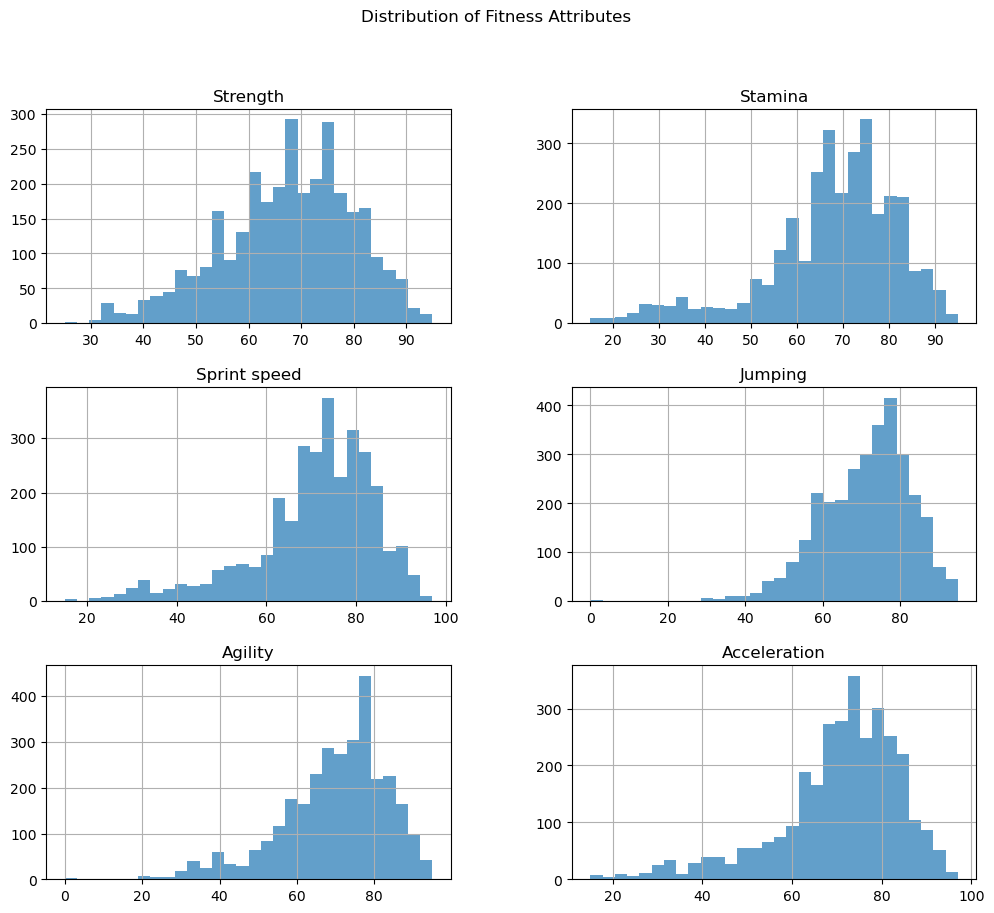

In [7]:
plt.figure(figsize=(12, 8))
df[fitness_attributes].hist(bins=30, figsize=(12, 10), layout=(3, 2), alpha=0.7)
plt.suptitle("Distribution of Fitness Attributes")
plt.show()

We see the distributions are mostly left skewed

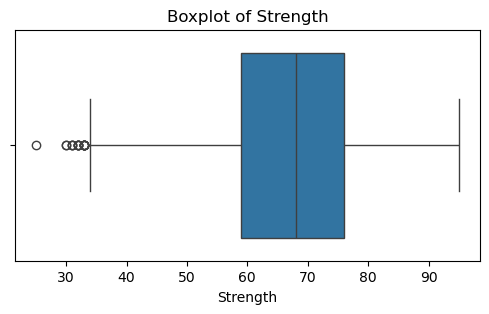

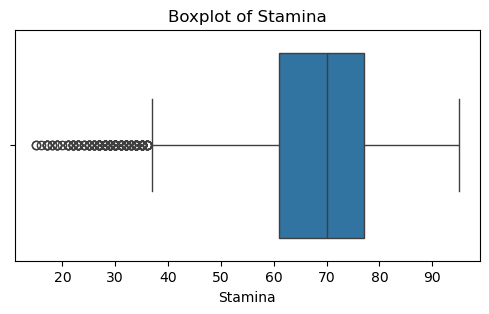

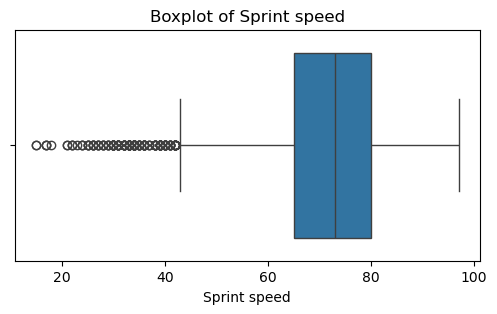

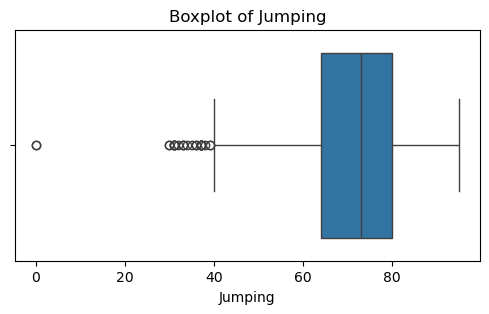

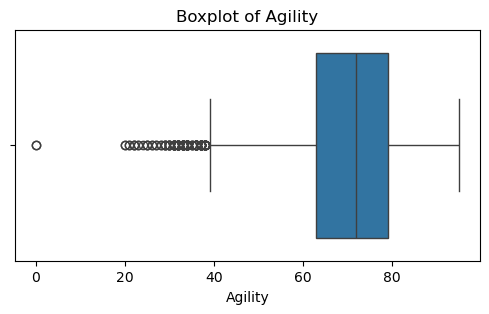

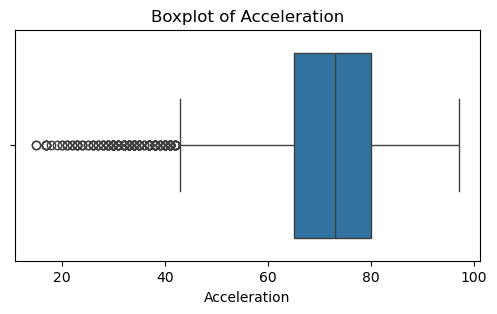

In [8]:
for col in fitness_attributes:
    if col in df.columns and df[col].notna().sum() > 0:
        plt.figure(figsize=(6, 3))
        sns.boxplot(x=df[col].dropna())
        plt.title(f"Boxplot of {col}")
        plt.show()

Outliers lie on the left

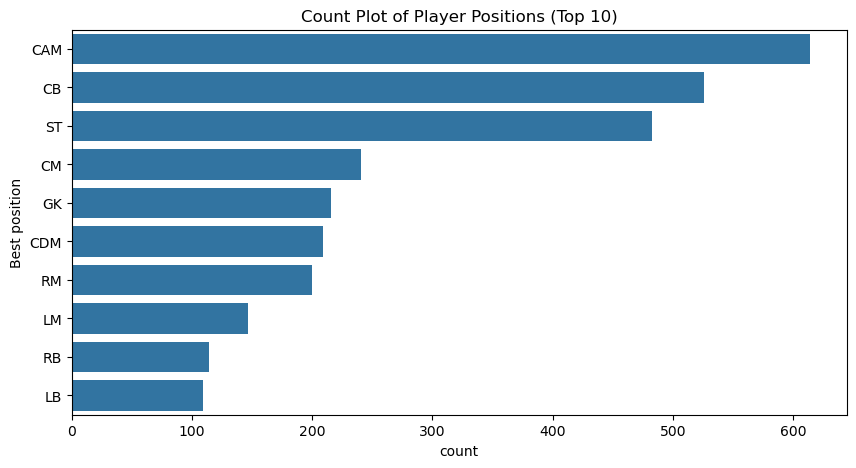

In [9]:
plt.figure(figsize=(10, 5))
top_positions = df['Best position'].value_counts().nlargest(10).index
sns.countplot(y=df['Best position'], order=top_positions)
plt.title("Count Plot of Player Positions (Top 10)")
plt.show()

Strongest and Fastest Players

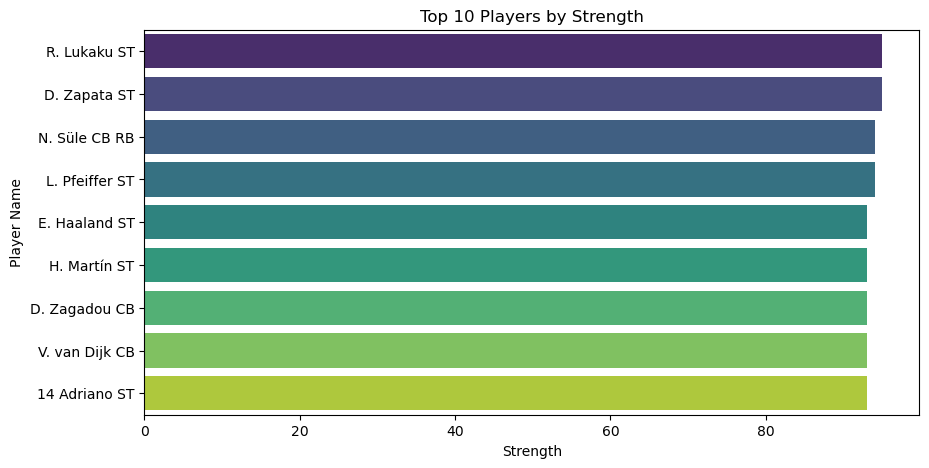

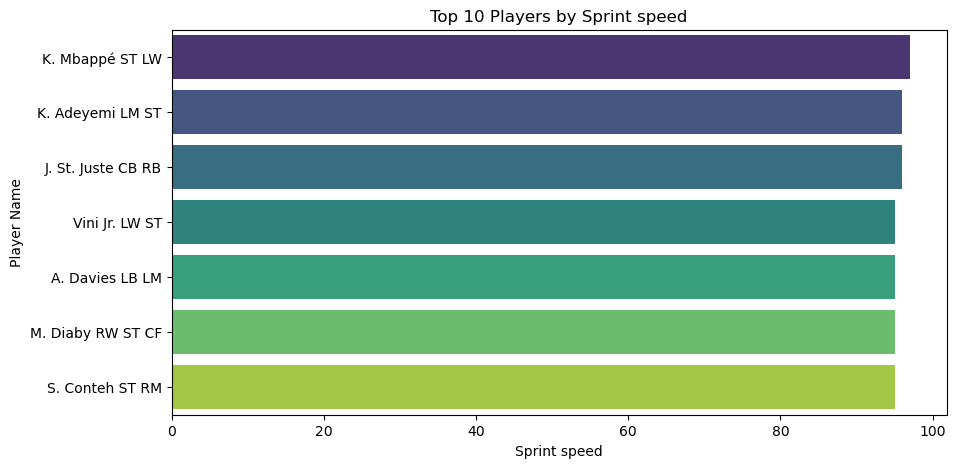

In [10]:
for attribute in ['Strength', 'Sprint speed']:
    if attribute in df.columns:
        top_10 = df.nlargest(10, attribute)[['name', attribute]]
        plt.figure(figsize=(10, 5))
        sns.barplot(x=top_10[attribute], y=top_10['name'], palette="viridis")
        plt.title(f"Top 10 Players by {attribute.capitalize()}")
        plt.xlabel(attribute.capitalize())
        plt.ylabel("Player Name")
        plt.show()

MULTIVARIATE ANALYSIS

In [14]:
performance_metrics = ['Overall rating', 'Total stats', 'Best overall']
performance_metrics = ['Overall rating', 'Total stats', 'Best overall']
for col in performance_metrics:
    if col in df.columns:
        df[col] = df[col].astype(str).str.extract(r'(\d+)')[0]  # Extract only numeric values
        df[col] = pd.to_numeric(df[col], errors='coerce')

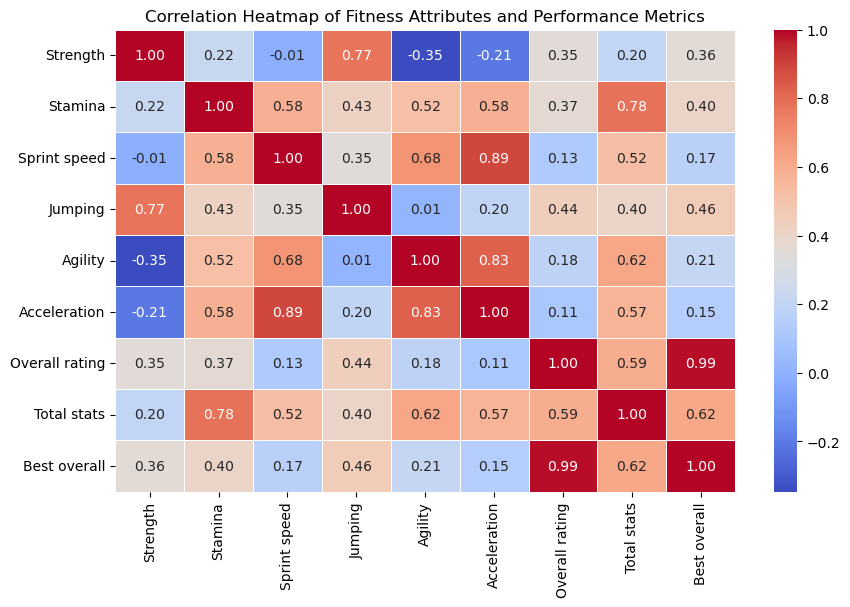

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[fitness_attributes + performance_metrics].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Fitness Attributes and Performance Metrics")
plt.show()

High correlation-
Strength and Jumping: shows strength training benefits jump.
Sprint speed and Acceleration: shows acceleration and sprint are grown together.
Agility and Acceleration:show acceleration and agility are grown together.
Stamina and Overall rating: A good player needs good stamina.


In [ ]:
Medium correlation-
Stamina and Sprint speed
Stamina and Acceleration
Agility and Stamina
Agility and Sprint speed
Jumping and Overall stats
Sprint speed and Overall stats

Negative correlation:
Strength has negative correlation with Speed ,agility,acceleration showing that strength training may negatively affect these attributes.

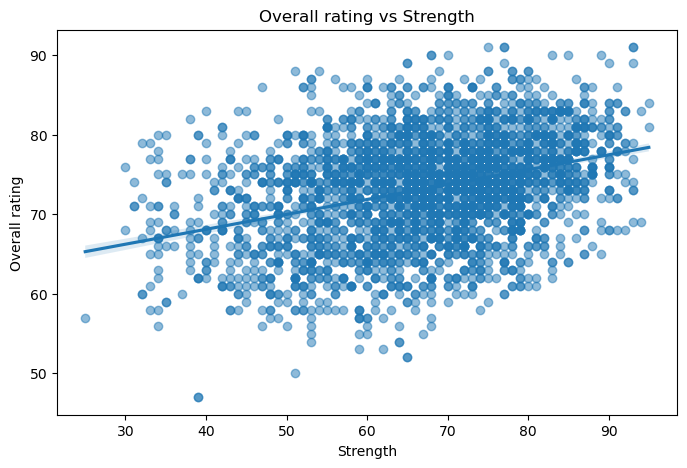

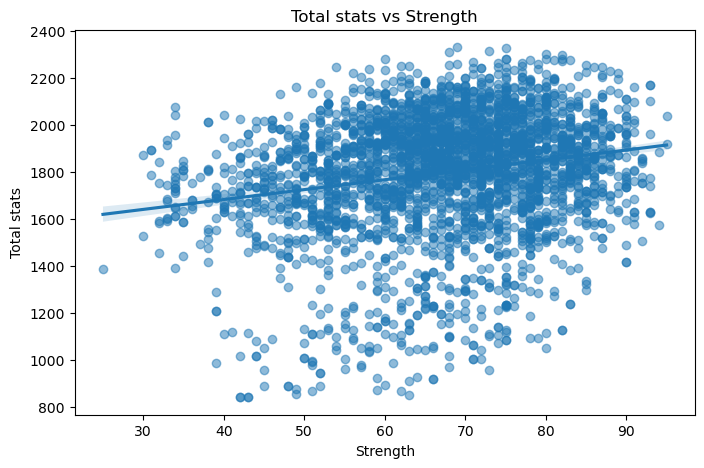

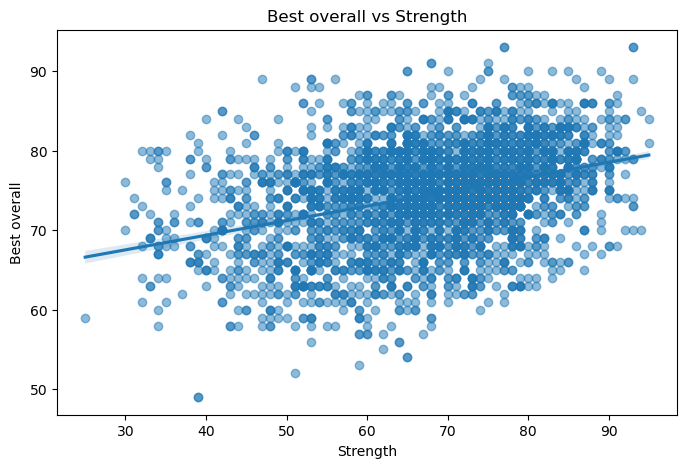

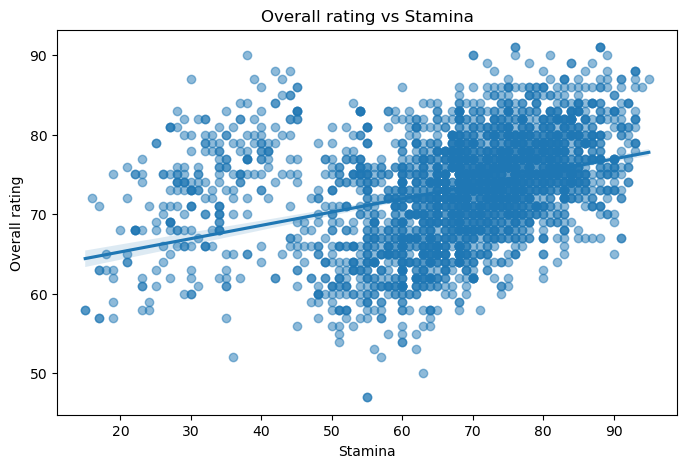

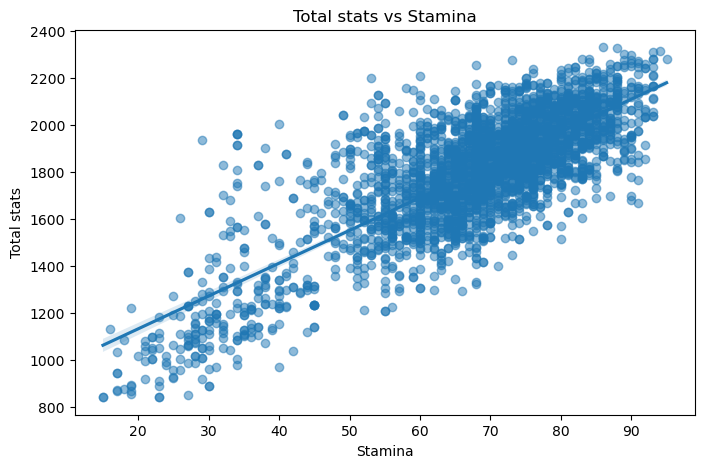

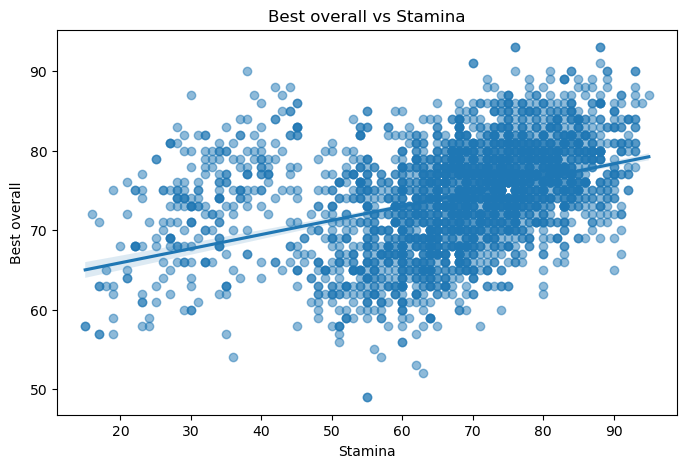

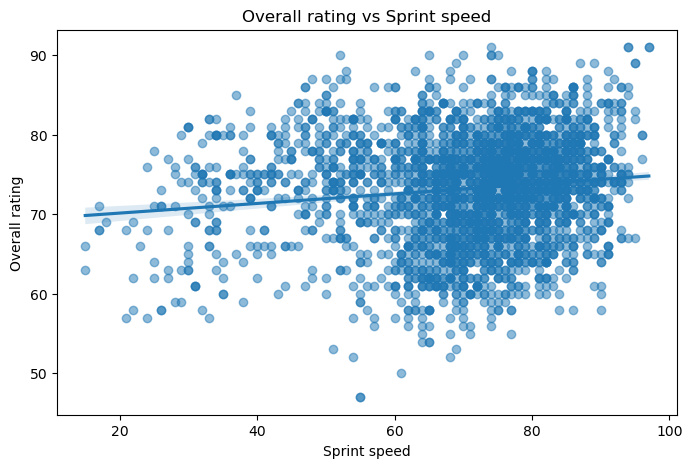

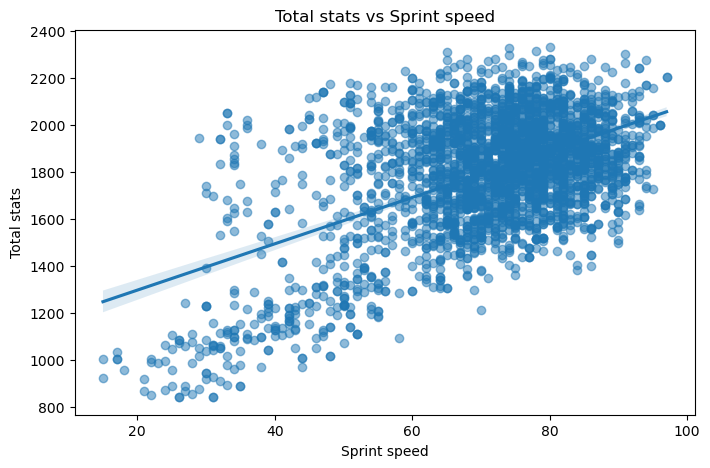

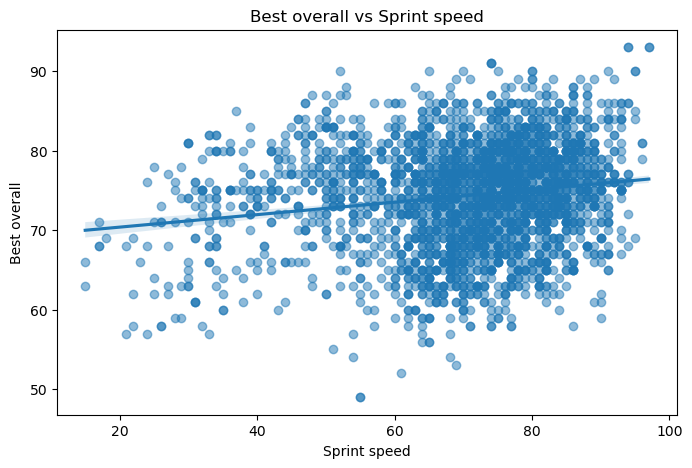

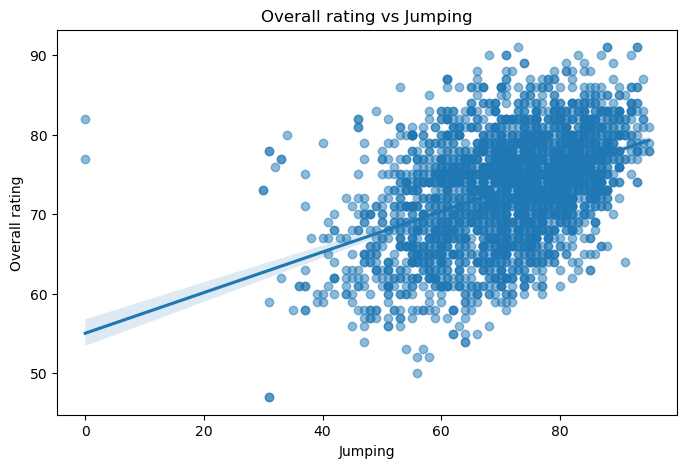

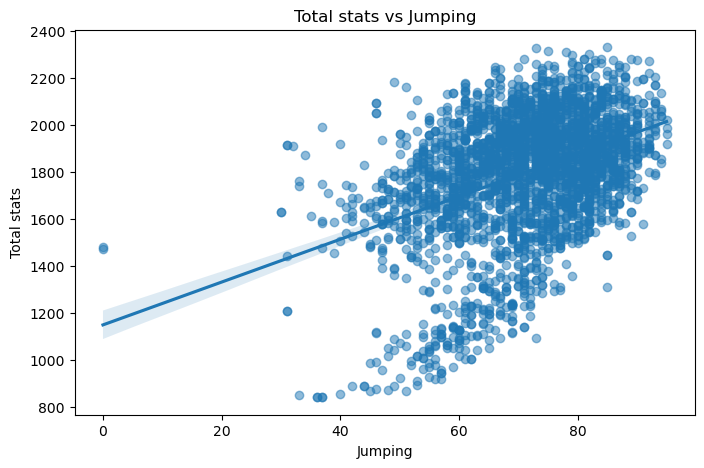

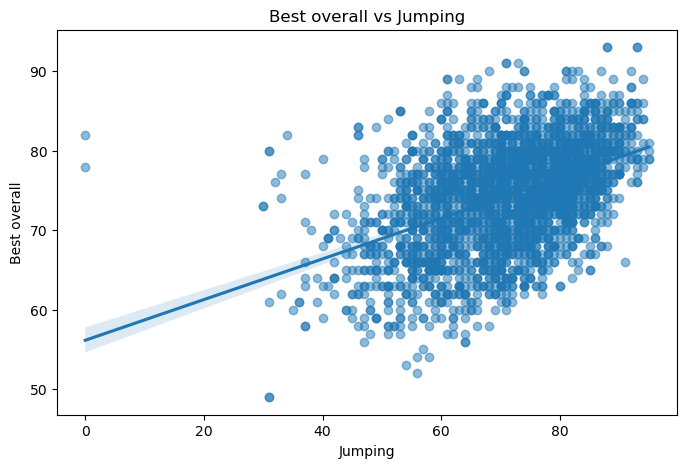

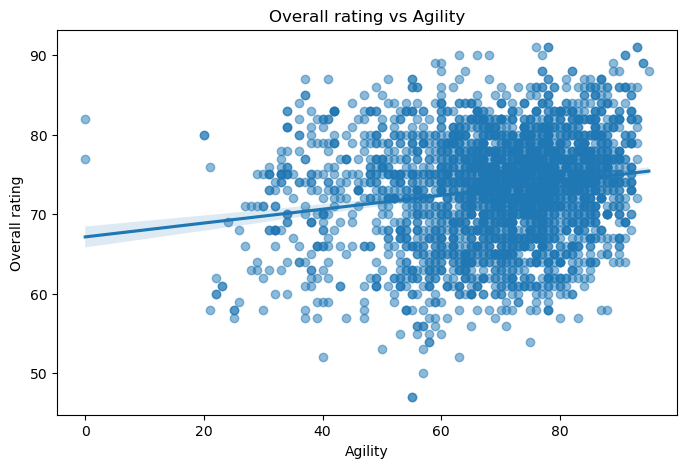

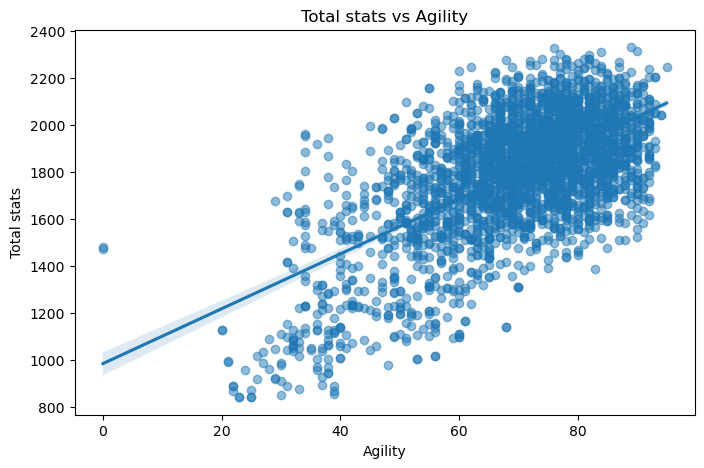

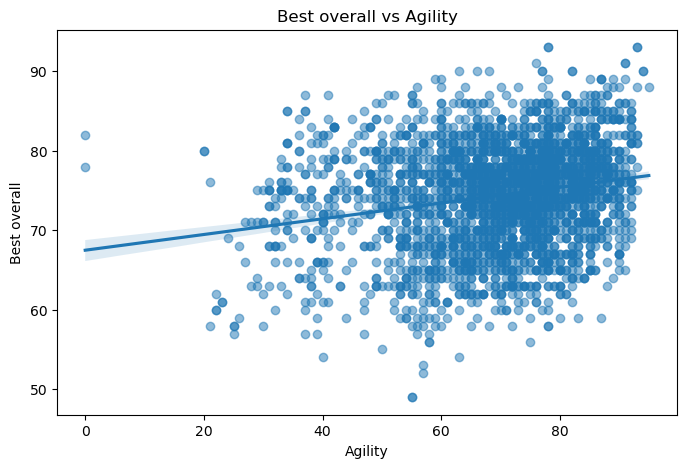

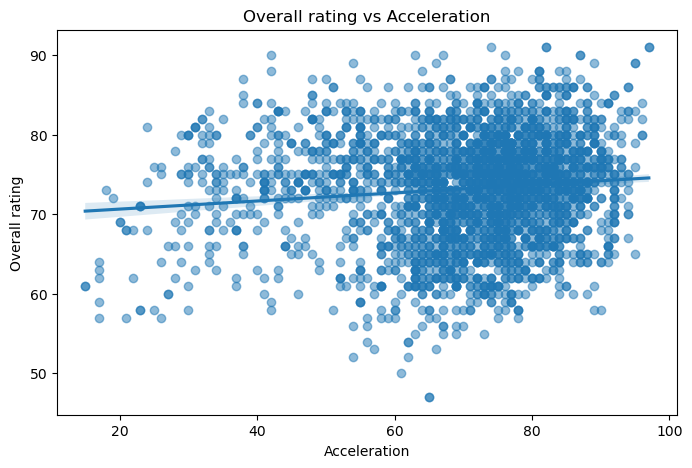

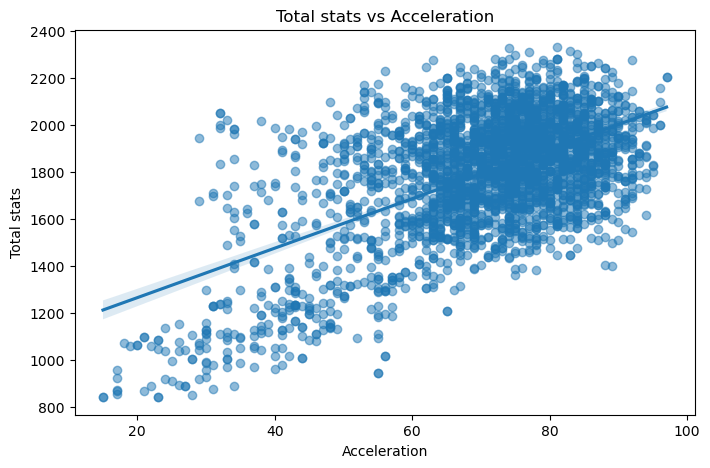

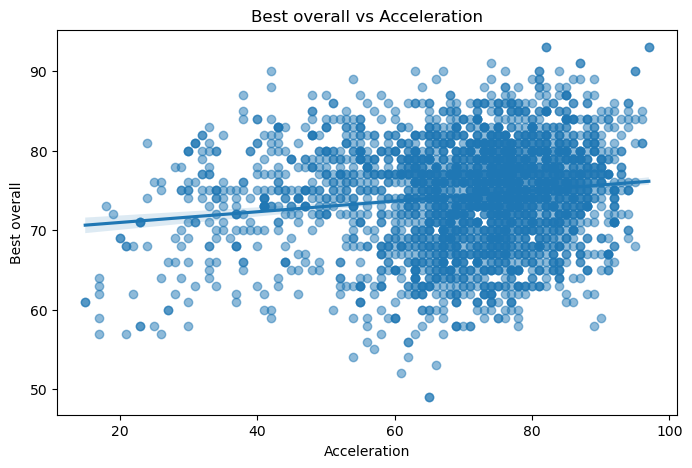

In [17]:
for fit_attr in fitness_attributes:
    for perf_metric in performance_metrics:
        if fit_attr in df.columns and perf_metric in df.columns:
            plt.figure(figsize=(8, 5))
            sns.regplot(x=df[fit_attr], y=df[perf_metric], scatter_kws={'alpha':0.5})
            plt.title(f"{perf_metric} vs {fit_attr}")
            plt.xlabel(fit_attr)
            plt.ylabel(perf_metric)
            plt.show()

We see how performance changes with increase in fitness